# Experiment: finding drive frequency for different subharmonics


In [2]:
import numpy as np
from qutip import basis
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
from qutip import sigmax, sigmay, sigmaz, sigmam, mesolve, mcsolve

def qubit_integrate_labframe(omega_0, omega_d, rabi, theta,psi0, solver, phi = 0, g1 = 0, g2 = 0, tlist=np.linspace(0,5000,10000)):

    H0 = (omega_0/2) * sigmaz()
    H1 = 2 * rabi * np.sin(theta) * sigmax()
    H2 = 2 * rabi * np.cos(theta) * sigmaz()
    
    def H1_coeff(t, args):
        return np.cos(omega_d*t+phi)
        
    def H2_coeff(t, args):
        return np.cos(omega_d*t+phi)
    
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
    
    H = [H0, [H1,H1_coeff],  [H2,H2_coeff]]
    
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    #elif solver == "es":
    #    output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, e_ops)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [22]:
def find_and_plot_subharmonic(N, rabi, theta, omega_d, t_max=150000, samples=10000):
    omega_0 = 1.0 * np.pi   # resonance frequency
    g2 = 0.0
    g1 = 0.0
    psi0 = basis(2,0)
    tlist = np.linspace(0, t_max, samples)
    phi = 0

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, omega_d, rabi, theta, psi0, "me", phi, g1, g2, tlist)

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(tlist, np.real(sz_brwa_d), 'g')
    ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"N={N} Resonance at w_d = {omega_d/np.pi:.10f}π")

## N = 3

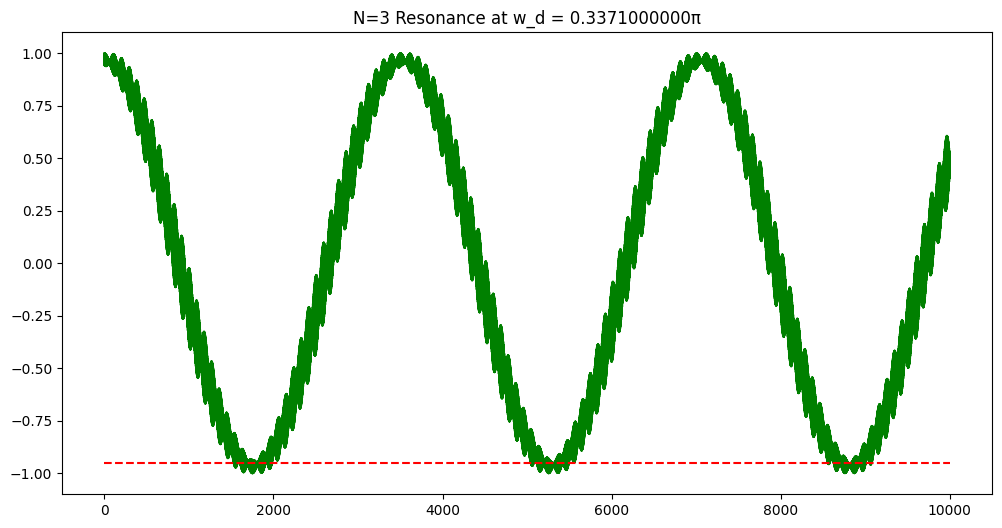

In [26]:
find_and_plot_subharmonic(3, 0.05 * np.pi, 0.5 * np.pi, 0.3371 * np.pi, t_max=10000)

## N = 4

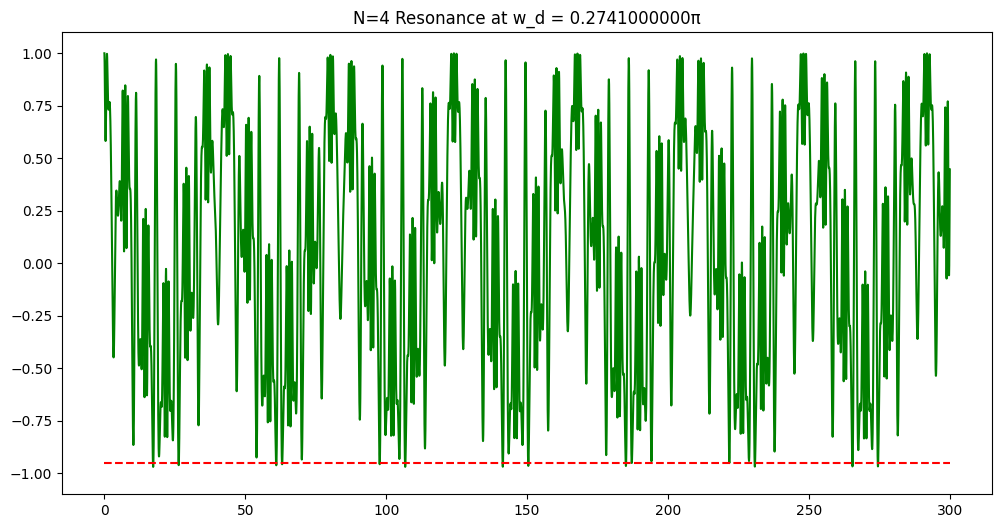

In [28]:
find_and_plot_subharmonic(4, 0.27 * np.pi / np.sin(0.25 * np.pi), 0.25 * np.pi, 0.2741000000000000103028696685214526951313018798828125 * np.pi, t_max=300)

## N = 5